In [145]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import statistics
init_notebook_mode(connected=True)
import plotly.graph_objs as go 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
plt.style.use('fivethirtyeight')

In [146]:
df = pd.read_csv("Engineering_graduate_salary.csv")
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


**Description of the variables used in the dataset**
* ID: A unique ID to identify a candidate
* Salary: Annual CTC offered to the candidate (in INR)
* Gender: Candidate's gender
* DOB: Date of birth of the candidate
* 10percentage: Overall marks obtained in grade 10 examinations
* 10board: The school board whose curriculum the candidate followed in grade 10
* 12graduation: Year of graduation - senior year high school
* 12percentage: Overall marks obtained in grade 12 examinations
* 12board: The school board whose curriculum the candidate followed
* CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
* CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
* Degree: Degree obtained/pursued by the candidate
* Specialization: Specialization pursued by the candidate
* CollegeGPA: Aggregate GPA at graduation
* CollegeCityID: A unique ID to identify the city in which the college is located in.
* CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
* CollegeState: Name of the state in which the college is located
* GraduationYear: Year of graduation (Bachelor's degree)
* English: Scores in AMCAT English section
* Logical: Score in AMCAT Logical ability section
* Quant: Score in AMCAT's Quantitative ability section
* Domain: Scores in AMCAT's domain module
* ComputerProgramming: Score in AMCAT's Computer programming section
* ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
* ComputerScience: Score in AMCAT's Computer Science section
* MechanicalEngg: Score in AMCAT's Mechanical Engineering section
* ElectricalEngg: Score in AMCAT's Electrical Engineering section
* TelecomEngg: Score in AMCAT's Telecommunication Engineering section
* CivilEngg: Score in AMCAT's Civil Engineering section
* conscientiousness: Scores in one of the sections of AMCAT's personality test
* agreeableness: Scores in one of the sections of AMCAT's personality test
* extraversion: Scores in one of the sections of AMCAT's personality test
* nueroticism: Scores in one of the sections of AMCAT's personality test
* openess_to_experience: Scores in one of the sections of AMCAT's personality test
Note: AMCAT is a job portal

There are no NaN values in the dataset

In [4]:
df.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

Converting '-1' values seen under the variables that represent test scores to 'NaN' values

In [147]:
df.replace(-1, np.NaN,inplace=True)

Removing ID variables from the dataset

In [148]:
df.drop(['ID','CollegeID','CollegeCityID'], axis = 1, inplace = True)

Renaming 'Salary' to 'Salary (Thousands of INR)' and dividing the Salary values by 1000

In [149]:
df = df.rename(columns={'Salary': 'Salary (Thousands of INR)'})
df['Salary (Thousands of INR)'] = df['Salary (Thousands of INR)'] / 1000
df

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary (Thousands of INR)
0,f,1990-10-22,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,NaN,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445.0
1,m,1990-05-15,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,...,NaN,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110.0
2,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,...,NaN,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255.0
3,m,1991-05-04,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,...,NaN,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420.0
4,f,1990-10-30,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,...,NaN,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,1989-04-17,75.00,0,2005,73.00,0,2,B.Tech/B.E.,electronics and communication engineering,...,NaN,NaN,NaN,NaN,-1.1901,0.9688,-1.0697,1.35490,0.0284,120.0
2994,f,1991-07-22,84.00,state board,2008,77.00,state board,2,B.Tech/B.E.,information technology,...,NaN,NaN,NaN,NaN,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120.0
2995,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,2,B.Tech/B.E.,information technology,...,NaN,NaN,NaN,NaN,-0.8810,0.1888,-0.3440,0.06230,0.6603,385.0
2996,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,2,B.Tech/B.E.,computer engineering,...,NaN,NaN,NaN,NaN,1.4374,1.2808,-0.4891,-1.46537,0.5419,530.0


Renaming 'nueroticism' to 'neuroticism'

In [150]:
df = df.rename(columns={'nueroticism': 'neuroticism'})

Below is a heatmap of the correlation between the metrics in the dataset

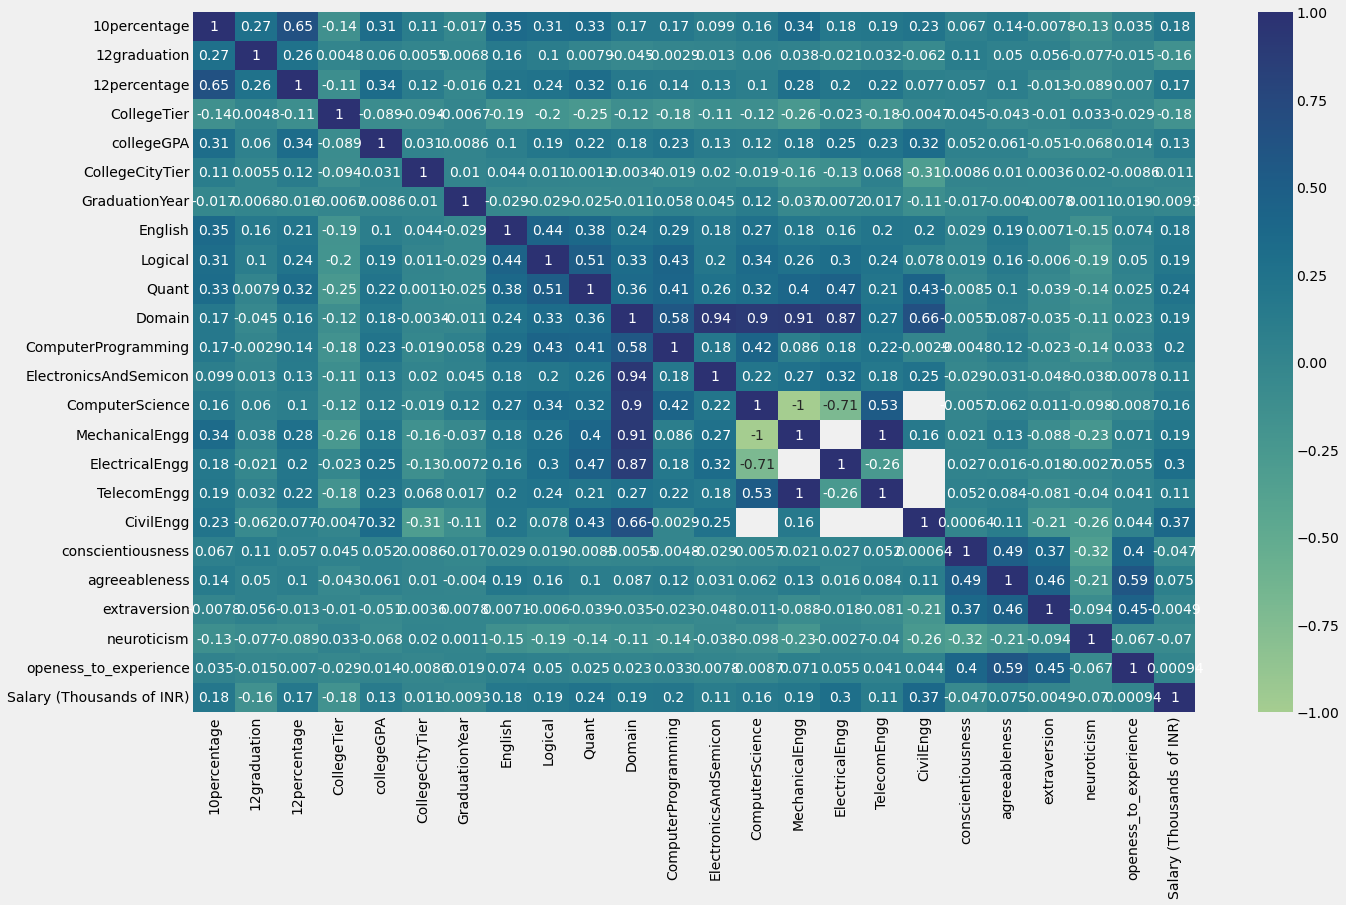

In [151]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

Finding the median of the correlation coefficient values in the cells from rows and columns 'English' to 'CivilEngg'

In [104]:
#creating a dataframe of the correlation coefficients
corr = df.corr()
#appending the correlation coefficients of the rows and columns 'English' to 'CivilEngg'
list_of_corr = []
for i in range(7, 18):
    for j in range(7, 18):
        list_of_corr.append(corr.iloc[i, j])
#removing '1' and 'NaN' values
while 1 in list_of_corr:
    list_of_corr.remove(1)
list_of_corr = [x for x in list_of_corr if str(x) != 'nan']
#finding the median of the remaining values
print(statistics.median(list_of_corr))

0.2727096996408699


Finding the median correlation coeffecient value of the 23 non-salary variables with graduate salary

In [105]:
#list of correlation coefficient values, exluding the '1' where salary correlates to itself
list_of_corr_grad_sal = []
for i in range(23,  24):
    for j in range(0, 23):
        list_of_corr_grad_sal.append(corr.iloc[i, j])
print(statistics.median(list_of_corr_grad_sal))

0.1319115242487563


Creating a regression line to model the correlation between performance on the civil engineering exam and graduate salary

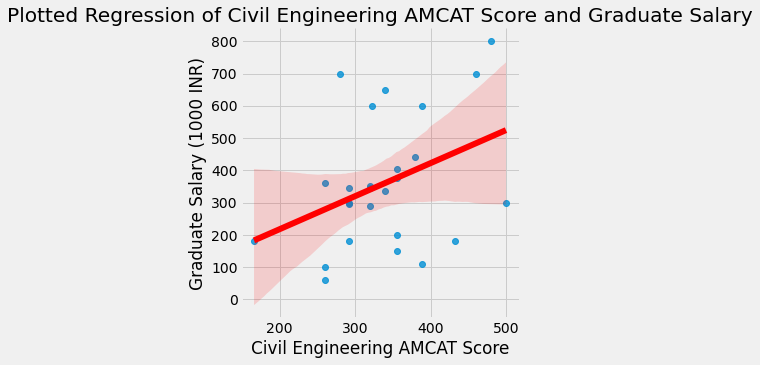

In [152]:
sns.lmplot(x='CivilEngg', y='Salary (Thousands of INR)', data=df, line_kws={'color': 'red'})
plt.xlabel('Civil Engineering AMCAT Score')
plt.ylabel('Graduate Salary (1000 INR)')
plt.title('Plotted Regression of Civil Engineering AMCAT Score and Graduate Salary')
plt.show()

Finding the cross-validated mean-square-error of the regression

In [153]:
civilengg_df = df[~df['CivilEngg'].isna()]

X = civilengg_df[['CivilEngg']]
y = civilengg_df['Salary (Thousands of INR)']
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=24, scoring='neg_mean_squared_error')
mean_score = -scores.mean()
print("Cross-validated test set error:", mean_score)


Cross-validated test set error: 39001.59071224219


Two salary distributions of the dataset, differentiated by gender

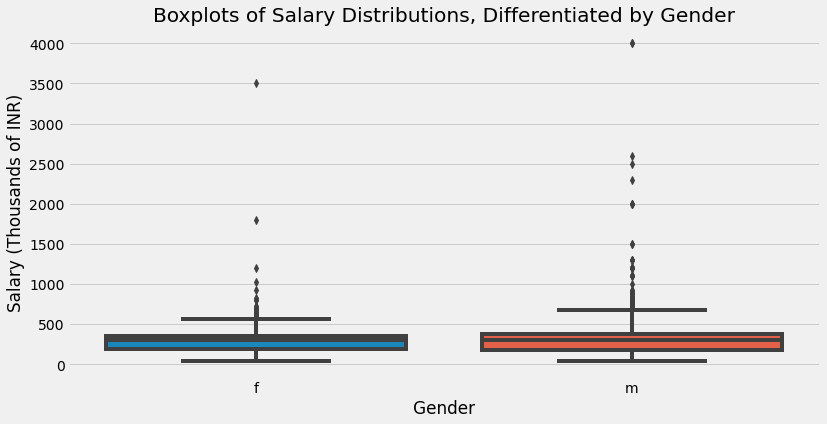

In [154]:
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Gender'], y=df['Salary (Thousands of INR)'] )

plt.title('Boxplots of Salary Distributions, Differentiated by Gender')
plt.show()

In [141]:
male = df[df['Gender'] == 'm']
female = df[df['Gender'] == 'f']
male['Salary (Thousands of INR)'].describe()
#female['Salary (Thousands of INR)'].describe()

count    2282.000000
mean      309.804557
std       218.547594
min        35.000000
25%       180.000000
50%       300.000000
75%       380.000000
max      4000.000000
Name: Salary (Thousands of INR), dtype: float64